In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import math
import os
#Hack to fix missing PROJ4 env var
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap, cm

In [91]:
def convert_rep_to_level(intensity):
    '''
    https://www.data.jma.go.jp/add/suishin/catalogue/format/ObdObs001_format.pdf
    ※3 1kmメッシュ気象庁レーダー全国合成のレベル値(0~251)に沿って変換する
    '''
    intensity_level = np.zeros_like(intensity)
    intensity_level[intensity==9.999e+20] = 0  # レーダー外の値
    intensity_level[intensity==0.1] = 0
    intensity_level[intensity==260] = 255

    step_list = [0.1, 0.25, 0.5, 1.0, 2]
    block_first = [0.25, 2.13, 5.25, 10.5, 181]
    data_num = [18, 12, 10, 170, 38]

    for i, step in enumerate(step_list):
        rep = block_first[i] - step
        for i in list(range(data_num[i])):
            rep = round(rep + step, 2)
            mmh = round((rep*2-step)/2, 2)
            #print(rep, mmh)
            intensity_level[intensity==rep] = mmh
            
    return intensity_level

In [92]:
def  crop_latlon(intensity, city):
    # 緯度経度の設定
    grid_shape = (3360,2560)
    lat_step = (48-20) / grid_shape[0]
    lon_step = (150-118) / grid_shape[1]

    lats = np.zeros((grid_shape[0],1))
    lons = np.zeros((1,grid_shape[1]))

    for i in list(range(grid_shape[0])):
        lats[i][0] = 48 - i*lat_step
    for i in list(range(grid_shape[1])):
        lons[0][i] = 118 + i*lon_step

    lats = np.tile(lats, (1,grid_shape[1]))
    lons = np.tile(lons, (grid_shape[0],1))

    # 座標を指定，その周辺を切り取る
    n = np.where(lats[:,0]<city[0]+d)[0][0]
    s = np.where(city[0]-d<lats[:,0])[0][-1]
    e = np.where(city[1]-d<lons[0,:])[0][0]
    w = np.where(lons[0,:]<city[1]+d)[0][-1]
    #print(lats[:,0][n],lats[:,0][s],lons[0,:][e],lons[0,:][w])
    
    intensity_city = intensity[n:s,e:w]
    lats_city = lats[n:s,e:w]
    lons_city = lons[n:s,e:w]
    return intensity_city, lats_city, lons_city

In [93]:
def draw_map(intensity, city, d=2, base_color='black'):
    # 切り出し
    intensity_city, lats_city, lons_city = crop_latlon(intensity, city)

    flat_lats_city = np.ravel(lats_city)
    flat_lons_city = np.ravel(lons_city)
    
    # 色指定
    coastline_color = 'white' if base_color == 'black' else 'black'
    zero_color = 0 if base_color == 'black' else 1

    # 色の変更
    cm = plt.cm.jet
    cm_list = cm(np.arange(cm.N))
    cm_list[0,:3] = zero_color    # 0の値の色を変更
    mycmap = ListedColormap(cm_list)
    
    # 描画
    m = Basemap(llcrnrlat=lats_city.min(),urcrnrlat=lats_city.max(), \
                        llcrnrlon=lons_city.min(),urcrnrlon=lons_city.max())  # 描画矩形座標を指定
    m.drawcoastlines(color=coastline_color)  # 海岸線
    m.contourf(flat_lons_city, flat_lats_city, intensity_city,list(range(0,255)),latlon=True, tri=True, cmap=mycmap) 

    plt.colorbar()
    plt.show()

In [94]:
#from pathlib import Path
filelist = !ls -d /home/kinoshita/synthetic/bin/*

/home/kinoshita/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


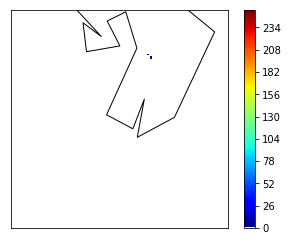

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101000000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


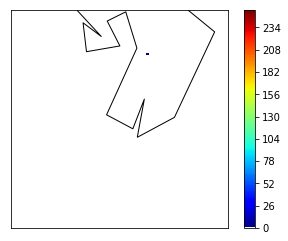

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101001000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


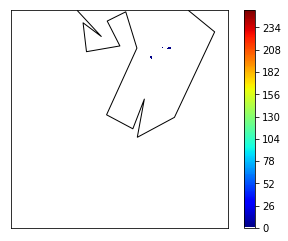

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101002000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


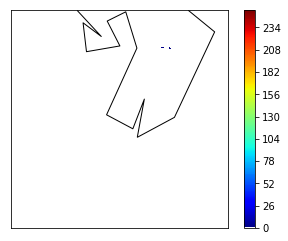

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101003000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


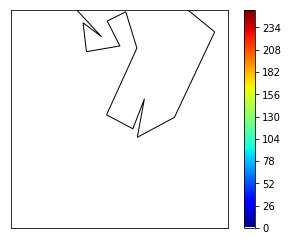

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101004000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


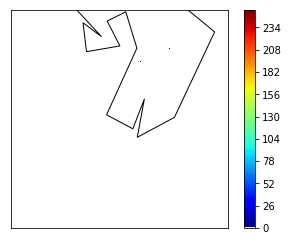

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101005000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


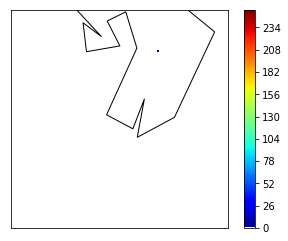

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101010000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


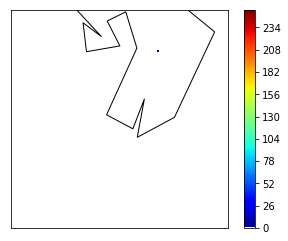

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101011000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


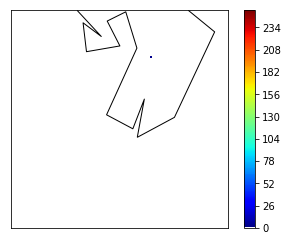

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101012000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


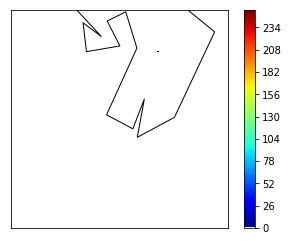

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101013000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


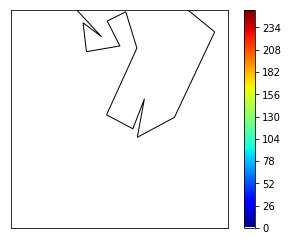

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101014000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


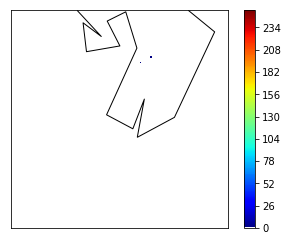

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101015000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


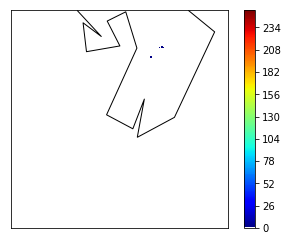

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101020000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


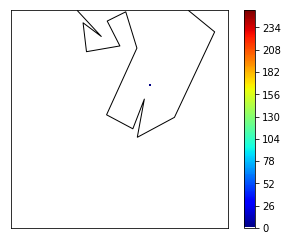

/home/kinoshita/synthetic/bin/Z__C_RJTD_20170101021000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.bin


In [ ]:
for filepath in filelist:
    sample = filepath
    #!wgrib2 $sample -order we:ns -V
    _=!wgrib2 $sample -order we:ns -no_header -bin ~/synthetic/temp.bin

    # 読み込み
    f = open('/home/kinoshita/synthetic/temp.bin', mode='rb')
    intensity = np.fromfile(f, dtype='float32',sep='').reshape(3360,2560)
    intensity_level = convert_rep_to_level(intensity)

    kagoshima = (31.33, 130.34)
    draw_map(intensity_level, kagoshima, d=1,base_color='white')
    print(filepath)